<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Huggingface-GPT2-example" data-toc-modified-id="Huggingface-GPT2-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Huggingface GPT2 example</a></span></li><li><span><a href="#Small-note-on-different-way-to-tokenize/encode-using-huggingface" data-toc-modified-id="Small-note-on-different-way-to-tokenize/encode-using-huggingface-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Small note on different way to tokenize/encode using huggingface</a></span></li><li><span><a href="#Prepare-data-for-training-GPT2-model-with-fastai" data-toc-modified-id="Prepare-data-for-training-GPT2-model-with-fastai-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare data for training GPT2 model with fastai</a></span><ul class="toc-item"><li><span><a href="#Create-Fastai-tokenizer-using-HuggingFace-tokenizer" data-toc-modified-id="Create-Fastai-tokenizer-using-HuggingFace-tokenizer-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create Fastai tokenizer using HuggingFace tokenizer</a></span></li><li><span><a href="#TfmdLists" data-toc-modified-id="TfmdLists-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>TfmdLists</a></span></li><li><span><a href="#Review-tfmdlists" data-toc-modified-id="Review-tfmdlists-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Review tfmdlists</a></span></li><li><span><a href="#Dataloaders" data-toc-modified-id="Dataloaders-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Dataloaders</a></span></li><li><span><a href="#Second-way-to-create-tfmlists-and-dataloaders:-preprocess-everything-before-hand-(do-once-and-for-all)" data-toc-modified-id="Second-way-to-create-tfmlists-and-dataloaders:-preprocess-everything-before-hand-(do-once-and-for-all)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Second way to create tfmlists and dataloaders: preprocess everything before hand (do once and for all)</a></span></li></ul></li><li><span><a href="#Fine-tuning-model" data-toc-modified-id="Fine-tuning-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fine-tuning model</a></span><ul class="toc-item"><li><span><a href="#Start-training" data-toc-modified-id="Start-training-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Start training</a></span></li><li><span><a href="#Predict" data-toc-modified-id="Predict-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Predict</a></span></li></ul></li></ul></div>

# Huggingface GPT2 example

In [1]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

In [2]:
# 12-layer, 768-hidden, 12-heads, 117M parameters.
# OpenAI GPT-2 English model
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

In [6]:
ids = tokenizer.encode('This is an example of text, and')
# ids = tokenizer.encode('This is an example of text, this is another example of text. :), :/')
ids

[1212,
 318,
 281,
 1672,
 286,
 2420,
 11,
 428,
 318,
 1194,
 1672,
 286,
 2420,
 13,
 1058,
 828,
 1058,
 14]

In [7]:
tokenizer.decode(ids)

'This is an example of text, this is another example of text. :), :/'

In [8]:
print([tokenizer.decode([i]) for i in ids])
# ',' and ', ' are tokenized differently. No decoding for emoji

['This', ' is', ' an', ' example', ' of', ' text', ',', ' this', ' is', ' another', ' example', ' of', ' text', '.', ' :', '),', ' :', '/']


In [20]:
text = "Who was Jim Henson? Jim Henson was a puppeteer who is one of the best person to"
ids = tokenizer.encode(text)
tokenizer.decode(ids)

'Who was Jim Henson? Jim Henson was a puppeteer who is one of the best person to'

In [18]:
import torch

In [21]:
t = torch.LongTensor(ids)[None]
t.shape

torch.Size([1, 22])

In [26]:
preds = model.generate(t,max_length=40) # default length is 20
preds.shape

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


torch.Size([1, 40])

In [27]:
preds[0]

tensor([ 8241,   373,  5395,   367, 19069,    30,  5395,   367, 19069,   373,
          257, 13595, 14471,   263,   508,   318,   530,   286,   262,  1266,
         1048,   284,   670,   351,   287,   262,  2106,   286,   262,   995,
           13,   679,   373,   257,  1049,  8674,    11,   257,  1049,  6260])

In [28]:
tokenizer.decode(preds[0].numpy())

'Who was Jim Henson? Jim Henson was a puppeteer who is one of the best person to work with in the history of the world. He was a great actor, a great writer'

# Small note on different way to tokenize/encode using huggingface

In [11]:
text = ["Hello I'm a single sentence",
                    "And anot`her sentence",
                    "And the very very last one"]

tmp_token = GPT2TokenizerFast.from_pretrained(pretrained_weights)

In [12]:
# function __call__
batch = tmp_token(text) 
print(batch)

{'input_ids': [[15496, 314, 1101, 257, 2060, 6827], [1870, 281, 313, 63, 372, 6827], [1870, 262, 845, 845, 938, 530]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}


In [55]:
# function encode, one at a time
# tmp_token.encode(text[0],truncation=True,max_length=4)
tmp_token.encode(text[0])

[15496, 314, 1101, 257, 2060, 6827]

In [58]:
# function tokenize, one at a time
# tmp_toks = tmp_token.tokenize(text[0],truncation=True,max_length=4)
tmp_toks = tmp_token.tokenize(text[0])
print(tmp_toks)
# convert to ids using convert_tokens_to_ids
print(tmp_token.convert_tokens_to_ids(tmp_toks))

['Hello', 'ĠI', "'m", 'Ġa', 'Ġsingle', 'Ġsentence']
[15496, 314, 1101, 257, 2060, 6827]


# Prepare data for training GPT2 model with fastai

In [1]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

# 12-layer, 768-hidden, 12-heads, 117M parameters.
# OpenAI GPT-2 English model
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

In [2]:
from fastai.text.all import *

In [3]:
path = untar_data(URLs.WIKITEXT_TINY)
path.ls()

(#2) [Path('/home/quan/.fastai/data/wikitext-2/test.csv'),Path('/home/quan/.fastai/data/wikitext-2/train.csv')]

In [4]:
df_train = pd.read_csv(path/'train.csv', header=None)
df_valid = pd.read_csv(path/'test.csv', header=None)
df_train.head()

,0
0,"\n = 2013 – 14 York City F.C. season = \n \n The 2013 – 14 season was the <unk> season of competitive association football and 77th season in the Football League played by York City Football Club , a professional football club based in York , North Yorkshire , England . Their 17th @-@ place finish in 2012 – 13 meant it was their second consecutive season in League Two . The season ran from 1 July 2013 to 30 June 2014 . \n Nigel Worthington , starting his first full season as York manager , made eight permanent summer signings . By the turn of the year York were only above the relegation z..."
1,"\n = Big Boy ( song ) = \n \n "" Big Boy "" <unk> "" I 'm A Big Boy Now "" was the first single ever recorded by the Jackson 5 , which was released by Steeltown Records in January 1968 . The group played instruments on many of their Steeltown compositions , including "" Big Boy "" . The song was neither a critical nor commercial success , but the Jackson family were delighted with the outcome nonetheless . \n The Jackson 5 would release a second single with Steeltown Records before moving to Motown Records . The group 's recordings at Steeltown Records were thought to be lost , but they were re..."
2,"\n = The Remix ( Lady Gaga album ) = \n \n The Remix is a remix album by American recording artist Lady Gaga . Released in Japan on March 3 , 2010 , it contains remixes of the songs from her first studio album , The Fame ( 2008 ) , and her third extended play , The Fame Monster ( 2009 ) . A revised version of the track list was prepared for release in additional markets , beginning with Mexico on May 3 , 2010 . A number of recording artists have produced the songs , including Pet Shop Boys , Passion Pit and The Sound of Arrows . The remixed versions feature both uptempo and <unk> composit..."
3,"\n = New Year 's Eve ( Up All Night ) = \n \n "" New Year 's Eve "" is the twelfth episode of the first season of the American comedy television series Up All Night . The episode originally aired on NBC in the United States on January 12 , 2012 . It was written by Erica <unk> and was directed by Beth McCarthy @-@ Miller . The episode also featured a guest appearance from Jason Lee as Chris and Reagan 's neighbor and Ava 's boyfriend , Kevin . \n During Reagan ( Christina Applegate ) and Chris 's ( Will <unk> ) first New Year 's Eve game night , Reagan 's competitiveness comes out causing Ch..."
4,"\n = Geopyxis carbonaria = \n \n Geopyxis carbonaria is a species of fungus in the genus Geopyxis , family <unk> . First described to science in 1805 , and given its current name in 1889 , the species is commonly known as the charcoal loving elf @-@ cup , dwarf <unk> cup , <unk> <unk> cup , or pixie cup . The small , <unk> @-@ shaped fruitbodies of the fungus are reddish @-@ brown with a whitish fringe and measure up to 2 cm ( 0 @.@ 8 in ) across . They have a short , tapered stalk . Fruitbodies are commonly found on soil where brush has recently been burned , sometimes in great numbers ...."


In [5]:
# concat all texts
all_texts = np.concatenate([df_train[0].values, df_valid[0].values])
len(all_texts)

662

In [6]:
# print(all_texts[0])

In [7]:
bs,sl = 6,1024

## Create Fastai tokenizer using HuggingFace tokenizer

Build a Fastai's ``Transform`` that will be applied **lazily**. Use Huggingface tokenizer within Fastai tokenizer

In a fastai Transform you can define:

- an encodes method that is applied when you call the transform (a bit like the forward method in a nn.Module)
- a decodes method that is applied when you call the decode method of the transform, if you need to decode anything for showing purposes (like converting ids to a text here)
- a setups method that sets some inner state of the Transform (not needed here so we skip it)

In [8]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        # Note: we don't use tokenizer.encode here as encode function will do additional padding stuff
        # we don't need any post-processing so it's fine to skip it.
        # Note: this will process 1 sentence at a time
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
        
    def decodes(self, x): 
        # use fastai TiledStr for showing purposes
        return TitledStr(self.tokenizer.decode(x.cpu().numpy()))
    

In [9]:
tmp = TitledStr('haha')

In [10]:
tmp.capitalize()

'Haha'

In [11]:
tmp.show()

haha


## TfmdLists

In [12]:
splits = [range_of(df_train), list(range(len(df_train), len(all_texts)))]
# splits[0] is indices for train set, splits[1] is indices for validation set

In [13]:
range_of(df_train)[-10:]

[605, 606, 607, 608, 609, 610, 611, 612, 613, 614]

In [14]:
type(all_texts)

numpy.ndarray

In [15]:
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

Token indices sequence length is longer than the specified maximum sequence length for this model (4576 > 1024). Running this sequence through the model will result in indexing errors


## Review tfmdlists

In [77]:
len(tls),len(tls.train),len(tls.valid)

(662, 615, 47)

In [85]:
# 2 different pipelines with same transformation type for train and valid
tls.train.tfms,hex(id(tls.train.tfms)),tls.valid.tfms,hex(id(tls.valid.tfms))

(Pipeline: TransformersTokenizer,
 '0x7fe413a6e7f0',
 Pipeline: TransformersTokenizer,
 '0x7fe413a6ec10')

In [92]:
tls.valid.items[0][:100]

' \n = Tropical Storm <unk> ( 2008 ) = \n \n Tropical Storm <unk> was the tenth tropical storm of the 20'

In [99]:
tls.train[0] # when indexed, items in tfmdlist are transformed

tensor([220, 198, 796,  ..., 198, 220, 198])

In [90]:
tls.valid[0] # when indexed, items in tfmdlist are transformed

tensor([220, 198, 796,  ..., 198, 220, 198])

In [98]:
# using decodes function you create above
tls.decodes(tls.train[0][:10]),tls.decodes(tls.train[0][-10:])

(' \n = 2013 – 14 York City F.', ' ; <unk> – Forward \n \n')

In [96]:
tls.decodes(tls.valid[0][:10]),tls.decodes(tls.valid[0][-10:])

(' \n = Tropical Storm <unk> ( 2008', ' was caused by the flood. \n \n')

In [103]:
# you can also using show_at to decode
# show_at(tls.train,0)

## Dataloaders

In [16]:

# GPT2 model was trained with sequences of size 1024
dls = tls.dataloaders(bs=bs, seq_len=sl) 
# Note: you can even use seq_len, something that is unique to nlp, into dataloaders, hmm

In [17]:
type(dls)

fastai.data.core.DataLoaders

In [107]:
dls.show_batch(max_n=2)

,text,text_
0,"\n = George N. Briggs = \n \n George Nixon Briggs ( April 12, 1796 – September 12, 1861 ) was an American lawyer and politician from Massachusetts. A Whig, Briggs served for twelve years in the United States House of Representatives, and served seven one @-@ year terms as the 19th Governor of Massachusetts, from 1844 to 1851. \n <unk> in rural <unk> New York, Briggs studied law in western Massachusetts, where his civic involvement and successful legal practice preceded <unk> political activity. He was elected to Congress in 1830, where he supported the conservative Whig agenda, serving on the Committee on the Post Office and Post Roads. He was also a regular advocate of temperance, <unk> from all alcohol consumption. \n He was nominated by the Whigs in 1843 to run against Democratic Governor Marcus Morton as part of a Whig bid for more rural votes, and","\n = George N. Briggs = \n \n George Nixon Briggs ( April 12, 1796 – September 12, 1861 ) was an American lawyer and politician from Massachusetts. A Whig, Briggs served for twelve years in the United States House of Representatives, and served seven one @-@ year terms as the 19th Governor of Massachusetts, from 1844 to 1851. \n <unk> in rural <unk> New York, Briggs studied law in western Massachusetts, where his civic involvement and successful legal practice preceded <unk> political activity. He was elected to Congress in 1830, where he supported the conservative Whig agenda, serving on the Committee on the Post Office and Post Roads. He was also a regular advocate of temperance, <unk> from all alcohol consumption. \n He was nominated by the Whigs in 1843 to run against Democratic Governor Marcus Morton as part of a Whig bid for more rural votes, and easily"
1,"covered the song with guitar and violin accompaniment, for her 2007 album In The City + In The Woods. British close harmony trio The <unk> Sisters covered "" Crazy in Love "" for their 2007 album The Rise and Fall of Ruby <unk> ; this was remixed by the electronica jazz outfit The Real Tuesday <unk>. Indie artist <unk> recorded an electronic cover of the song. In 2009, Pattern Is Movement recorded a cover of "" Crazy in Love "", which they claimed was inspired by <unk>'s version ; this cover was included on their 4 / 9 / 2009 <unk> session. Antony and the <unk> released an orchestral version of the song as the b @-@ side to their 2009 single "" <unk> "". \n German group The <unk> covered the song in rockabilly style for their debut album Strike! Back in August 2010. "" Crazy in Love","the song with guitar and violin accompaniment, for her 2007 album In The City + In The Woods. British close harmony trio The <unk> Sisters covered "" Crazy in Love "" for their 2007 album The Rise and Fall of Ruby <unk> ; this was remixed by the electronica jazz outfit The Real Tuesday <unk>. Indie artist <unk> recorded an electronic cover of the song. In 2009, Pattern Is Movement recorded a cover of "" Crazy in Love "", which they claimed was inspired by <unk>'s version ; this cover was included on their 4 / 9 / 2009 <unk> session. Antony and the <unk> released an orchestral version of the song as the b @-@ side to their 2009 single "" <unk> "". \n German group The <unk> covered the song in rockabilly style for their debut album Strike! Back in August 2010. "" Crazy in Love """


## Second way to create tfmlists and dataloaders: preprocess everything before hand (do once and for all)

In [31]:
def tokenize(text):
    toks = tokenizer.tokenize(text)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(all_texts)]

In [32]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
#         we still account for the case where we get something that's not already tokenized, 
# just in case we were to build a dataset with new texts using this transform.
        return x if isinstance(x, Tensor) else tokenize(x)
        
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [33]:
splits = [range_of(df_train), list(range(len(df_train), len(all_texts)))]


In [36]:
tls = TfmdLists(tokenized, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
dls = tls.dataloaders(bs=bs, seq_len=sl)

# Fine-tuning model

https://docs.fast.ai/tutorial.transformers.html#Fine-tuning-the-model

In [25]:
??Callback

We need to write the event after_pred and **replace self.learn.pred (which contains the predictions that will be passed to the loss function) by just its first element**, because by default, **output of Huggingface model is always a tuple**
```python
outputs = model(tokens_tensor, token_type_ids=segments_tensors)
    # Transformers models always output tuples.
    # See the models docstrings for the detail of all the outputs
predictions = outputs[0]
```

In [17]:
class DropOutput(Callback):
    def after_pred(self): 
#         print(len(self.learn.pred)) # tuple size 2 in HuggingFace prediction 
#         print(len(self.learn.pred[1])) # there are 12 things in the 2nd item of the tuple
#         print(self.learn.pred[1][0].shape) # something of size torch.Size([2, 6, 12, 1024, 64]). 
# Look at gpt2 output for more details? 

        self.learn.pred = self.learn.pred[0] # prediction of size torch.Size([6, 1024, 50257])
#         self.learn.pred = self.pred[0] # self.learn.pred == self.pred

Create a fastai learner, which **groups dataloaders, model and loss function**. Language model will use **perplexity** as a metric, and CrossEntropyLoss as loss function

In [18]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), 
                cbs=[DropOutput], 
                metrics=Perplexity()).to_fp16()

In [48]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [20]:
learn.dls.train,learn.dls[0],learn.dls.valid,learn.dls[1]

(<fastai.text.data.LMDataLoader at 0x7f9b24a82340>,
 <fastai.text.data.LMDataLoader at 0x7f9b24a82280>)

In [49]:
# check loss and metric of 1 epoch of learn.dls.valid
learn.validate()

(#2) [3.2635746002197266,26.142820358276367]

In [29]:
tmp_batch = next(iter(learn.dls.train))

In [30]:
tmp_batch[0].shape,tmp_batch[1].shape

(torch.Size([6, 1024]), torch.Size([6, 1024]))

In [31]:
result = learn.model(tmp_batch[0])

In [32]:
result.logits.shape

torch.Size([6, 1024, 50257])

## Start training

SuggestedLRs(lr_min=0.0001737800776027143, lr_steep=9.999999747378752e-06)

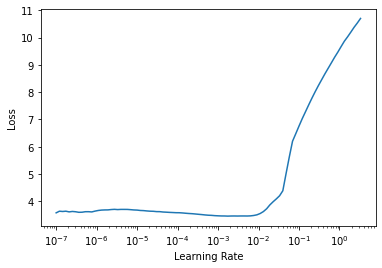

In [19]:
# learn.lr_find()

SuggestedLRs(lr_min=0.00036307806149125097, lr_steep=0.0002290867705596611)

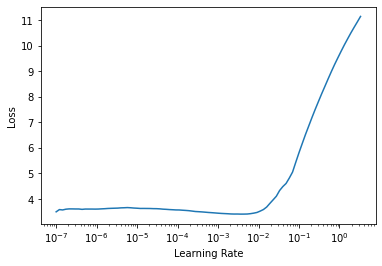

In [23]:
learn.lr_find()

In [19]:
learn.fit_one_cycle(2, 1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,2.996551,2.733771,15.390821,02:57
1,2.859244,2.696790,14.832037,02:51


## Predict

In [67]:
prompt = "\n = Coder school = \n \n Coder school is a nonprofit organization to "

In [68]:
tokenizer

PreTrainedTokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_len=1024, is_fast=True, padding_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'})

In [69]:
prompt_ids = tokenizer.encode(prompt)
print(prompt_ids)


[198, 796, 327, 12342, 1524, 796, 220, 198, 220, 198, 327, 12342, 1524, 318, 257, 15346, 4009, 284, 220]


In [70]:
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 19])

In [104]:
preds = learn.model.generate(inp, max_length=80, num_beams=2, temperature=1.5) # use huggingface generative model

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [105]:
len(preds)

1

In [106]:
tokenizer.decode(preds[0].cpu().numpy())

"\n = Coder school = \n \n Coder school is a nonprofit organization to \n <unk> and <unk> <unk>. The school is run by <unk> <unk>, a former <unk>. The school's principal, <unk> <unk>, is a former <unk>. \n \n = = <unk> = ="